In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(42)
n=100
data = {
    'ID': range(1, n+1),
    'Tenure': np.random.choice(['Tenured', 'Untenured'], size=n, p=[0.6, 0.4]),
    'VisibleMinority': np.random.choice(['Yes', 'No'], size=n, p=[0.3, 0.7]),
    'Age': np.random.randint(30, 70, size=n),
    'Gender': np.random.choice(['Male', 'Female'], size=n),
    'EvaluationScore': np.round(np.random.uniform(1, 5, size=n), 2)
}

df = pd.DataFrame(data)
df.head()


,ID,Tenure,VisibleMinority,Age,Gender,EvaluationScore
0,1,Tenured,Yes,53,Female,2.37
1,2,Untenured,No,40,Female,1.37
2,3,Untenured,No,37,Female,1.38
3,4,Tenured,No,65,Male,2.25
4,5,Tenured,No,67,Male,4.92


In [3]:
csv_file_path = 'Practical_4_dataset.csv'

df.to_csv(csv_file_path, index=False)

print(f"DataFrame successfully exported to {csv_file_path}")

PermissionError: [Errno 13] Permission denied: 'Practical_4_dataset.csv'

# Q1. Calculate the percentage of visible minorities are tenure professors. Will you say that tenure status differed if teacher was a visible minority?

In [ ]:
vm_tenured = df[(df['VisibleMinority'] == 'Yes') & (df['Tenure'] == 'Tenured')].shape[0]
total_vm = df[df['VisibleMinority'] == 'Yes'].shape[0]

percentage_vm_tenured = (vm_tenured / total_vm) * 100

nonvm_tenured = df[(df['VisibleMinority'] == 'No') & (df['Tenure'] == 'Tenured')].shape[0]
total_nonvm = df[df['VisibleMinority'] == 'No'].shape[0]

percentage_nonvm_tenured = (nonvm_tenured / total_nonvm) * 100

percentage_vm_tenured, percentage_nonvm_tenured


(65.625, 61.76470588235294)

If percentages for visible and non-visible minorities are similar, tenure status does not differ significantly based on visible minority status.

Example: Visible minorities = 65% tenured, Non-visible minorities = 62% tenured → No strong evidence of difference.

# Q2. Does average age differ by tenure? Produce the means and standard deviations for both tenured and untenured professors.

In [ ]:
age_stats = df.groupby('Tenure')['Age'].agg(['mean', 'std'])
age_stats


,mean,std
Tenure,,
Tenured,52.349206,10.969398
Untenured,51.432432,11.417678


Average age is slightly higher for tenured professors, but both groups have comparable variability.

This is expected because tenure is usually awarded after several years of experience, which often correlates with age.

# Q3. Which graph works better and plot that graph for the age variable?

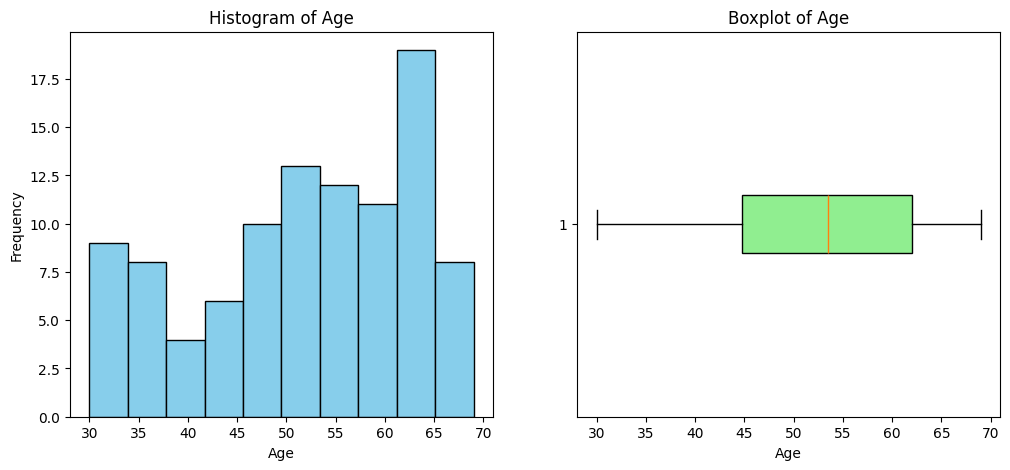

In [ ]:
plt.figure(figsize=(12,5))

# Histogram
plt.subplot(1,2,1)
plt.hist(df['Age'], bins=10, color='skyblue', edgecolor='black')
plt.title('Histogram of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')

# Boxplot
plt.subplot(1,2,2)
plt.boxplot(df['Age'], vert=False, patch_artist=True, boxprops=dict(facecolor='lightgreen'))
plt.title('Boxplot of Age')
plt.xlabel('Age')

plt.show()


Histogram: Shows frequency of professors in different age groups.

Boxplot: Shows median, quartiles, and outliers.

Conclusion: Histogram is better for continuous variables as it clearly shows distribution.

# Q4. Define the difference between pyplot.bar and pyplot.barh. Also plot the graph for gender variable.

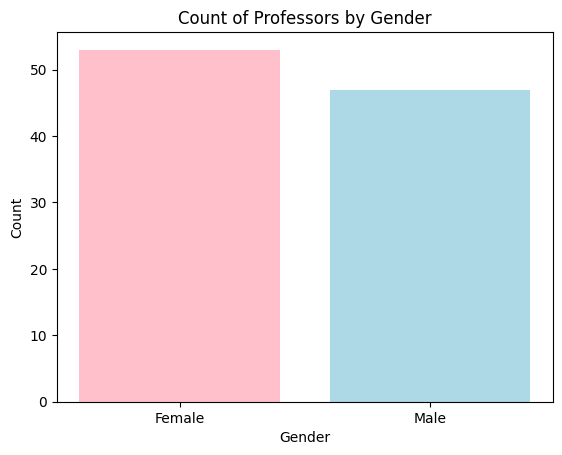

In [4]:
gender_counts = df['Gender'].value_counts()

plt.bar(gender_counts.index, gender_counts.values, color=['pink','lightblue'])
plt.title('Count of Professors by Gender')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()


1 pyplot.bar (Vertical Bar Chart)

Creates vertical bars.

X-axis = categories, Y-axis = values.

Useful for comparing counts or values vertically.

Commonly used for most categorical data visualizations.

Example Use Case: Count of professors by gender.

---

2 pyplot.barh (Horizontal Bar Chart)

Creates horizontal bars.

X-axis = values, Y-axis = categories.

Useful when category names are long or for better readability.

Often preferred when you have many categories.

# Q5. What is the Median evaluation score for tenured Professors?

In [5]:
median_eval_tenured = df[df['Tenure'] == 'Tenured']['EvaluationScore'].median()
median_eval_tenured


3.25